In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay, \
multilabel_confusion_matrix


In [94]:
#Read csv data
data_train = pd.read_csv('../data_preparation/subset_train_expanded.csv', index_col=0)
data_train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1276,M16135,M,298.1,309.4,1362,47.6,70,0,0,0,0,0,0
9931,L57110,L,298.3,308.3,1452,45.5,63,0,0,0,0,0,0
5403,L52582,L,302.7,312.3,1421,48.5,0,0,0,0,0,0,0
9437,L56616,L,298.0,308.6,1481,42.5,54,0,0,0,0,0,0
564,L47743,L,297.7,309.6,1529,35.2,153,0,0,0,0,0,0


In [95]:
#define function for classifying type based on Load
def type_new(row):
    if row['Type'] == 'L':
        val = '1'
    elif row['Type'] == 'M':
        val = '2'
    else:
        val = '3'
    return val

In [96]:
#create new column 
data_train['Type_Num'] = data_train.apply(type_new, axis=1)
data_train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_Num
UDI,,,,,,,,,,,,,,
1276,M16135,M,298.1,309.4,1362,47.6,70,0,0,0,0,0,0,2
9931,L57110,L,298.3,308.3,1452,45.5,63,0,0,0,0,0,0,1
5403,L52582,L,302.7,312.3,1421,48.5,0,0,0,0,0,0,0,1
9437,L56616,L,298.0,308.6,1481,42.5,54,0,0,0,0,0,0,1
564,L47743,L,297.7,309.6,1529,35.2,153,0,0,0,0,0,0,1


In [97]:
data_test = pd.read_csv('../data_preparation/subset_test_expanded.csv', index_col=0)
data_test['Type_Num'] = data_test.apply(type_new, axis=1)
data_test.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_Num
UDI,,,,,,,,,,,,,,
7600,L54779,L,300.5,311.0,1759,28.3,13,0,0,0,0,0,0,1
3665,M18524,M,302.3,311.7,1685,30.8,130,0,0,0,0,0,0,2
6718,M21577,M,301.4,310.6,1464,48.6,96,0,0,0,0,0,0,2
1077,L48256,L,296.9,307.7,1653,35.9,177,0,0,0,0,0,0,1
3130,L50309,L,300.1,309.6,1642,34.5,53,0,0,0,0,0,0,1


In [98]:
data_valid = pd.read_csv('../data_preparation/subset_valid_expanded.csv', index_col=0)
data_valid['Type_Num'] = data_valid.apply(type_new, axis=1)
data_valid.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_Num
UDI,,,,,,,,,,,,,,
1071,M15930,M,296.9,307.8,1477,37.2,160,0,0,0,0,0,0,2
1877,L49056,L,298.3,308.0,1242,62.0,98,0,0,0,0,0,0,1
2328,M17187,M,299.3,308.7,1420,50.3,208,0,0,0,0,0,0,2
6863,M21722,M,301.1,311.2,1384,49.4,48,0,0,0,0,0,0,2
945,M15804,M,295.7,306.3,1712,28.5,43,0,0,0,0,0,0,2


In [250]:
label = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', \
         'Torque [Nm]', 'Tool wear [min]', 'Type_Num']
target = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [357]:
from sklearn.neighbors import KNeighborsClassifier
X_train = data_train[label]
y_train = data_train[target]

X_test = data_test[label]
y_test = data_test[target]

X_valid = data_valid[label]
y_valid = data_valid[target]

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)
neigh.score(X_train, y_train)

0.9741107444077741

In [358]:
print('Training score : ', neigh.score(X_train, y_train))
print('Testing score : ', neigh.score(X_test, y_test))
print('Validation score : ', neigh.score(X_valid, y_valid))

Training score :  0.9741107444077741
Testing score :  0.6948284690220174
Validation score :  0.6439549180327869


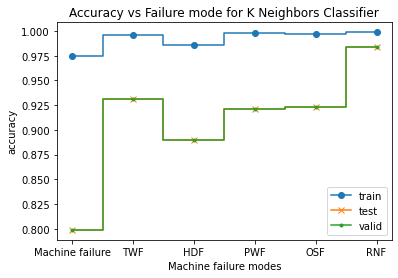

In [360]:
train_scores = []
test_scores = []
valid_scores = []
target = ['Machine failure', 'TWF', 'HDF','PWF', 'OSF', 'RNF']

for key in target:
    neigh = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train[key])
    train_score = [neigh.score(X_train, y_train[key])]
    test_score = [neigh.score(X_test, y_test[key]) ]
    valid_score = [neigh.score(X_valid, y_valid[key])]
    train_scores.append(train_score)
    test_scores.append(test_score)
    valid_scores.append(test_score)

fig, ax = plt.subplots()
ax.set_xlabel("Machine failure modes")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Failure mode for K Neighbors Classifier")
ax.plot(target, train_scores, marker="o", label='train', drawstyle="steps-mid")
ax.plot(target, test_scores, marker="x", label="test", drawstyle="steps-mid")
ax.plot(target, valid_scores, marker=".", label="valid", drawstyle="steps-mid")
ax.legend()
plt.show()

In [ ]:
#Compute the (weighted) graph of k-Neighbors for points in X.
A = neigh.kneighbors_graph(X_train)
A.toarray()

In [ ]:
cm_val = confusion_matrix(data_test[target], neigh.predict(data_test[label]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

## Decision tree

In [254]:
from sklearn import tree

X_train = data_train[label]
y_train = data_train[target]

X_test = data_test[label]
y_test = data_test[target]

X_valid = data_valid[label]
y_valid = data_valid[target]

clf = tree.DecisionTreeClassifier(max_depth=None)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(data_train[label])

y_test_pred = clf.predict(data_test[label])

y_valid_pred = clf.predict(data_valid[label])

<BarContainer object of 6 artists>

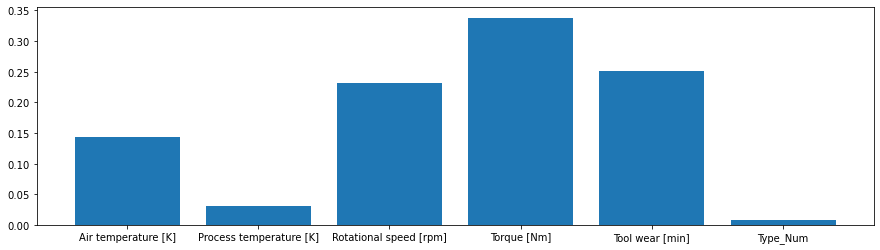

In [256]:
imp = np.vstack((label, clf.feature_importances_))
fig = plt.figure(figsize =(15, 4))
plt.bar(label, clf.feature_importances_)

In [255]:
print('Training score : ', clf.score(X_train, y_train))
print('Testing score : ', clf.score(X_test, y_test))
print('Validation score : ', clf.score(X_valid, y_valid))

Training score :  1.0
Testing score :  0.7864823348694316
Validation score :  0.7638319672131147


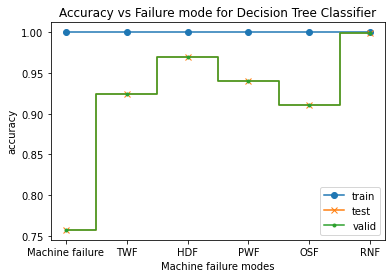

In [352]:
train_scores = []
test_scores = []
valid_scores = []
target = ['Machine failure', 'TWF', 'HDF','PWF', 'OSF', 'RNF']

for key in target:
    clf_p = tree.DecisionTreeClassifier().fit(X_train, y_train[key])
    train_score = [clf_p.score(X_train, y_train[key])]
    test_score = [clf_p.score(X_test, y_test[key]) ]
    valid_score = [clf_p.score(X_valid, y_valid[key])]
    train_scores.append(train_score)
    test_scores.append(test_score)
    valid_scores.append(test_score)

fig, ax = plt.subplots()
ax.set_xlabel("Machine failure modes")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Failure mode for Decision Tree Classifier")
ax.plot(target, train_scores, marker="o", label='train', drawstyle="steps-mid")
ax.plot(target, test_scores, marker="x", label="test", drawstyle="steps-mid")
ax.plot(target, valid_scores, marker=".", label="valid", drawstyle="steps-mid")
ax.legend()
plt.show()

### Model is overfit at training , thus we are getting low accuracy at prediction. So we need to prune the decision tree

In [257]:
print(classification_report(data_train[target], y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6873
           1       1.00      1.00      1.00       812
           2       1.00      1.00      1.00      2407
           3       1.00      1.00      1.00      2088
           4       1.00      1.00      1.00      1885
           5       1.00      1.00      1.00        44

   micro avg       1.00      1.00      1.00     14109
   macro avg       1.00      1.00      1.00     14109
weighted avg       1.00      1.00      1.00     14109
 samples avg       0.51      0.51      0.51     14109



C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [258]:
print(classification_report(data_test[target], y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80       986
           1       0.00      0.00      0.00       145
           2       1.00      0.80      0.89       290
           3       0.85      0.67      0.75       261
           4       0.99      0.85      0.91       377
           5       0.00      0.00      0.00         0

   micro avg       0.97      0.68      0.80      2059
   macro avg       0.64      0.50      0.56      2059
weighted avg       0.90      0.68      0.77      2059
 samples avg       0.34      0.33      0.33      2059



C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [259]:
print(classification_report(data_valid[target], y_valid_pred))

              precision    recall  f1-score   support

           0       0.99      0.57      0.73      1972
           1       0.00      0.00      0.00       377
           2       1.00      0.64      0.78       638
           3       0.98      0.79      0.87       406
           4       0.93      0.75      0.83       580
           5       0.00      0.00      0.00         3

   micro avg       0.97      0.58      0.72      3976
   macro avg       0.65      0.46      0.53      3976
weighted avg       0.89      0.58      0.69      3976
 samples avg       0.29      0.28      0.28      3976



C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm_val = confusion_matrix(data_train[target], y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [ ]:
cm_val = confusion_matrix(data_test[target], y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [ ]:
cm_val=confusion_matrix(data_valid[target], y_valid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [138]:
data_t = data_train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',\
                     'Torque [Nm]', 'Tool wear [min]', 'Type_Num','Machine failure']]

In [ ]:
#graph = graphviz.Source(dot_data)
#graph.render("data_t") 

In [26]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=label, class_names=target, filled=True, rounded=True,  special_characters=True)

In [27]:
import graphviz 
graph = graphviz.Source(dot_data) 

In [29]:
import pylab
graph.render(filename='tree_mul')
pylab.savefig('tree_mul.png')

<Figure size 432x288 with 0 Axes>

In [30]:
import graphviz as gv
import pylab

g1 = gv.Graph(format='png')

g1.node('A')
g1.node('B')
g1.edge('A', 'B')

g1.view()
print(g1.source) 

filename = g1.render(filename='img/g1')

pylab.savefig('filename.png')

graph {
	A
	B
	A -- B
}


<Figure size 432x288 with 0 Axes>

In [222]:
clf.get_depth()

20

In [260]:
#Post pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

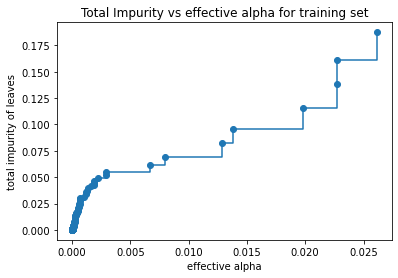

In [261]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [262]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04701977126762602


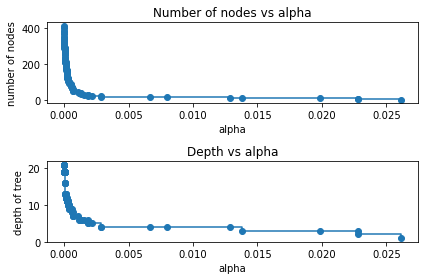

In [263]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

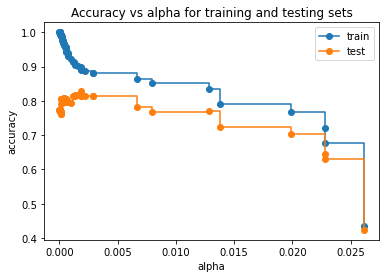

In [264]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(data_test[label], data_test[target]) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

https://towardsdatascience.com/pre-pruning-or-post-pruning-1dbc8be5cb14

# Tree Depth = 3

In [265]:
clf_p = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, 
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  class_weight=None, ccp_alpha=0.005)
clf_p = clf_p.fit(X_train, y_train)

y_test_pred = clf_p.predict(data_test[label])

y_valid_pred = clf_p.predict(data_valid[label])

In [266]:
print('Training score : ', clf_p.score(X_train, y_train))
print('Testing score : ', clf_p.score(X_test, y_test))
print('Validation score : ', clf_p.score(X_valid, y_valid))

Training score :  0.8803813714704803
Testing score :  0.8131080389144906
Validation score :  0.8127561475409836


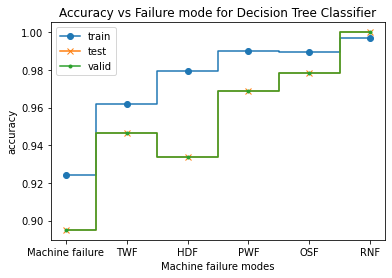

In [351]:
train_scores = []
test_scores = []
valid_scores = []
target = ['Machine failure', 'TWF', 'HDF','PWF', 'OSF', 'RNF']

for key in target:
    clf_p = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, 
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  class_weight=None, ccp_alpha=0.005).fit(X_train, y_train[key])
    train_score = [clf_p.score(X_train, y_train[key])]
    test_score = [clf_p.score(X_test, y_test[key]) ]
    valid_score = [clf_p.score(X_valid, y_valid[key])]
    train_scores.append(train_score)
    test_scores.append(test_score)
    valid_scores.append(test_score)

fig, ax = plt.subplots()
ax.set_xlabel("Machine failure modes")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Failure mode for Decision Tree Classifier")
ax.plot(target, train_scores, marker="o", label='train', drawstyle="steps-mid")
ax.plot(target, test_scores, marker="x", label="test", drawstyle="steps-mid")
ax.plot(target, valid_scores, marker=".", label="valid", drawstyle="steps-mid")
ax.legend()
plt.show()

In [267]:
clf_p.get_depth()

4

In [348]:
print(classification_report(data_test[target], y_test_pred), target_names=target)

C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_cla

TypeError: 'target_names' is an invalid keyword argument for print()

In [269]:
print(classification_report(data_test[target], y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       986
           1       0.66      0.60      0.63       145
           2       0.88      0.70      0.78       290
           3       0.86      0.89      0.87       261
           4       0.87      0.92      0.90       377
           5       0.00      0.00      0.00         0

   micro avg       0.87      0.87      0.87      2059
   macro avg       0.69      0.68      0.68      2059
weighted avg       0.87      0.87      0.87      2059
 samples avg       0.46      0.44      0.45      2059



C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [ ]:
confusion_matrix(data_valid[target], y_valid_pred)

[Text(167.4, 195.696, 'X[2] <= 1381.5\ngini = 0.234\nsamples = 13635\nvalue = [[6762, 6873]\n[12823, 812]\n[11228, 2407]\n[11547, 2088]\n[11750, 1885]\n[13591, 44]]'),
 Text(104.625, 152.208, 'X[4] <= 181.5\ngini = 0.247\nsamples = 5452\nvalue = [[812, 4640]\n[5394, 58]\n[3045, 2407]\n[4350, 1102]\n[4002, 1450]\n[5450, 2]]'),
 Text(83.7, 108.72, 'X[0] <= 301.55\ngini = 0.199\nsamples = 3789\nvalue = [[715, 3074]\n[3789, 0]\n[1585, 2204]\n[2861, 928]\n[3731, 58]\n[3787, 2]]'),
 Text(41.85, 65.232, 'X[3] <= 62.45\ngini = 0.181\nsamples = 1270\nvalue = [[603, 667]\n[1270, 0]\n[1270, 0]\n[632, 638]\n[1212, 58]\n[1270, 0]]'),
 Text(20.925, 21.744, 'gini = 0.0\nsamples = 579\nvalue = [[579, 0]\n[579, 0]\n[579, 0]\n[579, 0]\n[579, 0]\n[579, 0]]'),
 Text(62.775000000000006, 21.744, 'gini = 0.06\nsamples = 691\nvalue = [[24, 667]\n[691, 0]\n[691, 0]\n[53, 638]\n[633, 58]\n[691, 0]]'),
 Text(125.55000000000001, 65.232, 'X[3] <= 65.1\ngini = 0.085\nsamples = 2519\nvalue = [[112, 2407]\n[2519, 0]\

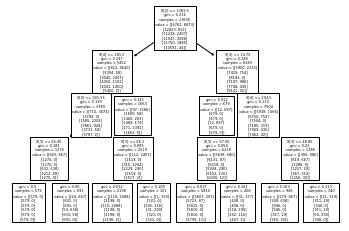

In [270]:
tree.plot_tree(clf_p)

In [271]:
dot_data = tree.export_graphviz(clf_p, out_file=None, feature_names=label, class_names=target, filled=True,\
                                rounded=True,  special_characters=True)

In [272]:
graph = graphviz.Source(dot_data) 

In [273]:
graph
graph.render(filename='tree_d3_mul')
pylab.savefig('tree_d3_mul.png')

<Figure size 432x288 with 0 Axes>

## Random Forest for multilabel output

In [274]:
from sklearn.ensemble import RandomForestClassifier

X_train = data_train[label]
y_train = data_train[target]

X_test = data_test[label]
y_test = data_test[target]

X_valid = data_valid[label]
y_valid = data_valid[target]

clf_rf = RandomForestClassifier(max_depth=None,ccp_alpha=0.0, random_state=0)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_train, y_train)

1.0

In [275]:
label = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', \
         'Torque [Nm]', 'Tool wear [min]', 'Type_Num']

<BarContainer object of 6 artists>

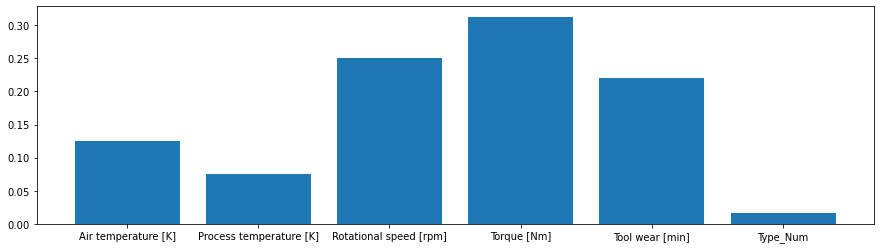

In [276]:
imp = np.vstack((label, clf_rf.feature_importances_))
fig = plt.figure(figsize =(15, 4))
plt.bar(label, clf_rf.feature_importances_)

In [277]:
print('Training score : ', clf_rf.score(X_train, y_train))
print('Testing score : ', clf_rf.score(X_test, y_test))
print('Validation score : ', clf_rf.score(X_valid, y_valid))

Training score :  1.0
Testing score :  0.7588325652841782
Validation score :  0.7305327868852459


In [278]:
clf_rf = RandomForestClassifier(n_estimators=100,criterion='entropy', max_depth=4, min_samples_split=2, \
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', \
                                max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, \
                                oob_score=False, n_jobs=None, random_state=0, verbose=0,\
                                warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
clf_rf.fit(X_train, y_train)
print('Train score :',clf_rf.score(X_train, y_train))
print('Test score : ',clf_rf.score(X_test, y_test))
print('Validation score : ',clf_rf.score(X_valid, y_valid))

Train score : 0.8383571690502384
Test score :  0.7393753200204813
Validation score :  0.7005635245901639


In [344]:
train_scores = []
test_scores = []
valid_scores = []
target = ['Machine failure', 'TWF', 'HDF','PWF', 'OSF', 'RNF']

for key in target:
    clf_rf = RandomForestClassifier(n_estimators=100,criterion='entropy', max_depth=4, min_samples_split=2, \
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', \
                                max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, \
                                oob_score=False, n_jobs=None, random_state=0, verbose=0,\
                                warm_start=False, class_weight=None, \
                                    ccp_alpha=0.0, max_samples=None).fit(X_train, y_train[key])
    train_score = [clf_rf.score(X_train, y_train[key])]
    test_score = [clf_rf.score(X_test, y_test[key]) ]
    valid_score = [clf_rf.score(X_valid, y_valid[key])]
    train_scores.append(train_score)
    test_scores.append(test_score)
    valid_scores.append(test_score)

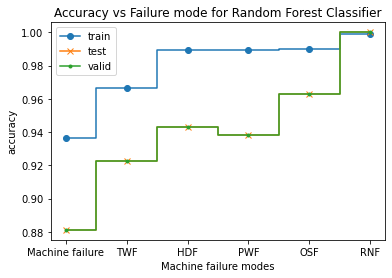

In [346]:
fig, ax = plt.subplots()
ax.set_xlabel("Machine failure modes")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Failure mode for Random Forest Classifier")
ax.plot(target, train_scores, marker="o", label='train', drawstyle="steps-mid")
ax.plot(target, test_scores, marker="x", label="test", drawstyle="steps-mid")
ax.plot(target, valid_scores, marker=".", label="valid", drawstyle="steps-mid")
ax.legend()
plt.show()

In [279]:
clf_rf.decision_path(X_train)

(<13635x3060 sparse matrix of type '<class 'numpy.int64'>'
 	with 6815005 stored elements in Compressed Sparse Row format>,
 array([   0,   31,   60,   91,  122,  151,  182,  213,  242,  271,  302,
         333,  364,  395,  424,  455,  486,  517,  548,  579,  610,  641,
         672,  701,  732,  763,  794,  825,  854,  883,  914,  945,  974,
        1005, 1034, 1065, 1096, 1127, 1158, 1189, 1220, 1251, 1282, 1311,
        1342, 1371, 1400, 1431, 1460, 1491, 1522, 1553, 1582, 1613, 1644,
        1675, 1706, 1737, 1768, 1799, 1830, 1861, 1892, 1923, 1954, 1985,
        2016, 2047, 2078, 2107, 2138, 2169, 2200, 2231, 2262, 2293, 2322,
        2353, 2384, 2413, 2444, 2475, 2506, 2537, 2568, 2599, 2630, 2661,
        2692, 2723, 2754, 2785, 2814, 2845, 2876, 2907, 2938, 2969, 2998,
        3029, 3060], dtype=int32))

In [337]:
#Classification report over test set
print(classification_report(clf_rf.predict(X_test), y_test, target_names=target))

                 precision    recall  f1-score   support

Machine failure       0.88      0.89      0.89       973
            TWF       0.00      0.00      0.00         0
            HDF       0.70      0.88      0.78       230
            PWF       0.67      0.84      0.74       207
            OSF       0.85      0.97      0.90       330
            RNF       0.00      0.00      0.00         0

      micro avg       0.76      0.90      0.82      1740
      macro avg       0.52      0.60      0.55      1740
   weighted avg       0.83      0.90      0.86      1740
    samples avg       0.38      0.44      0.40      1740



C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amank\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [ ]:
cm_val = confusion_matrix(data_valid[target], clf_rf.predict(X_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [340]:
matrices = multilabel_confusion_matrix(clf_rf.predict(X_test), y_test)
# Plotting matrices
cmd = ConfusionMatrixDisplay(matrices[0], display_labels=np.unique(y_tst)).plot()
plt.title('Confusion Matrix for label 1 (Machine Failure)')
plt.show()

## Extra Tree Classifier for multilabel output

In [280]:
from sklearn.tree import ExtraTreeClassifier

extra_tree = ExtraTreeClassifier(max_depth=3, random_state=0)

#cls = BaggingClassifier(extra_tree, random_state=0).fit(X_train, y_train)
extra_tree.fit(X_train, y_train)
print('Train score :',extra_tree.score(X_train, y_train))
print('Test score : ',extra_tree.score(X_test, y_test))
print('Validation score : ',extra_tree.score(X_valid, y_valid))

Train score : 0.6371837183718372
Test score :  0.604710701484895
Validation score :  0.633452868852459


In [281]:
X_train = data_train[label]
y_train = data_train[target]

X_test = data_test[label]
y_test = data_test[target]


X_valid = data_valid[label]
y_valid = data_valid[target]

<BarContainer object of 6 artists>

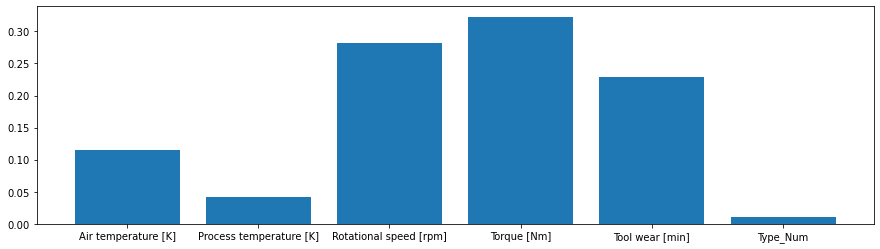

In [282]:
imp = np.vstack((label, extra_tree.feature_importances_))
fig = plt.figure(figsize =(15, 4))
plt.bar(label, clf_rf.feature_importances_)

## Gradient Boosted Tree for multilabel output

In [283]:
from sklearn.ensemble import GradientBoostingClassifier

In [314]:
train_scores = []
test_scores = []
valid_scores = []
target = ['Machine failure', 'TWF', 'HDF','PWF', 'OSF', 'RNF']

for key in target:
    clf_xg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, subsample=0.5,\
                                        max_depth=3, random_state=0).fit(X_train, y_train[key])
    train_score = [clf_xg.score(X_train, y_train[key])]
    test_score = [clf_xg.score(X_test, y_test[key]) ]
    valid_score = [clf_xg.score(X_valid, y_valid[key])]
    train_scores.append(train_score)
    test_scores.append(test_score)
    valid_scores.append(test_score)

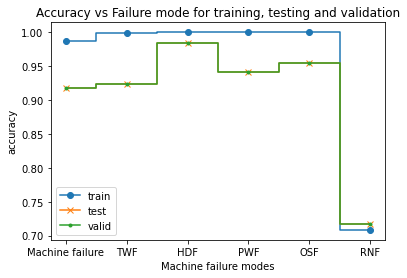

In [342]:
fig, ax = plt.subplots()
ax.set_xlabel("Machine failure modes")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Failure mode for training, testing and validation")
ax.plot(target, train_scores, marker="o", label='train', drawstyle="steps-mid")
ax.plot(target, test_scores, marker="x", label="test", drawstyle="steps-mid")
ax.plot(target, valid_scores, marker=".", label="valid", drawstyle="steps-mid")
ax.legend()
plt.show()

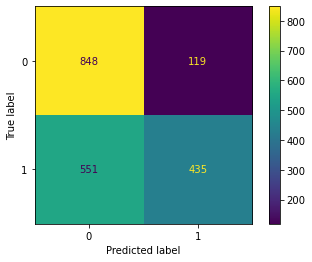

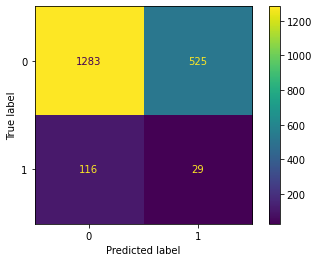

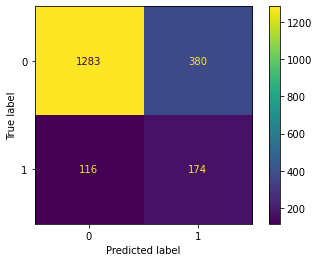

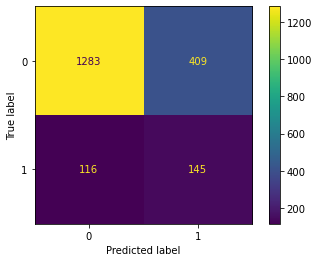

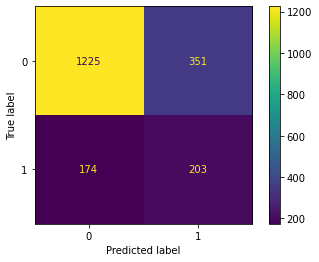

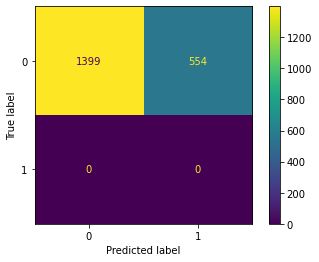

In [330]:
for key in target:
    cm_val = confusion_matrix(data_test[key], clf_xg.predict(X_test), labels=clf_xg.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=clf_xg.classes_)
    disp.plot()